In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv("C:\\Users\\ONEEKA\\Downloads\\titanic.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.shape

(183, 12)

In [9]:
df=df[['Pclass','Age','Fare','Sex','Survived']]
df

,Pclass,Age,Fare,Sex,Survived
1,1,38.0,71.2833,female,1
3,1,35.0,53.1000,female,1
6,1,54.0,51.8625,male,0
10,3,4.0,16.7000,female,1
11,1,58.0,26.5500,female,1
...,...,...,...,...,...
871,1,47.0,52.5542,female,1
872,1,33.0,5.0000,male,0
879,1,56.0,83.1583,female,1
887,1,19.0,30.0000,female,1


In [10]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [11]:
df

,Pclass,Age,Fare,Sex,Survived
1,1,38.0,71.2833,0,1
3,1,35.0,53.1000,0,1
6,1,54.0,51.8625,1,0
10,3,4.0,16.7000,0,1
11,1,58.0,26.5500,0,1
...,...,...,...,...,...
871,1,47.0,52.5542,0,1
872,1,33.0,5.0000,1,0
879,1,56.0,83.1583,0,1
887,1,19.0,30.0000,0,1


In [12]:
df.describe()

,Pclass,Age,Fare,Sex,Survived
count,183.000000,183.000000,183.000000,183.000000,183.000000
mean,1.191257,35.674426,78.682469,0.519126,0.672131
std,0.515187,15.643866,76.347843,0.501005,0.470725
min,1.000000,0.920000,0.000000,0.000000,0.000000
25%,1.000000,24.000000,29.700000,0.000000,0.000000
50%,1.000000,36.000000,57.000000,1.000000,1.000000
75%,1.000000,47.500000,90.000000,1.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000,1.000000


In [13]:
features=df[['Pclass','Age','Fare','Sex']]
target=df[['Sex']]

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.2,random_state=0)

In [15]:
model=DecisionTreeClassifier(criterion='gini',max_depth=7)
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=7)

In [16]:
model.score(X_train,Y_train)

1.0

In [17]:
model.score(X_test,Y_test)

1.0

In [18]:
model.feature_importances_

array([0., 0., 0., 1.])

In [19]:
model.predict(X_test)

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [20]:
model.predict([[2,70,500,1]])

D:\Anaconda_Navigator\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

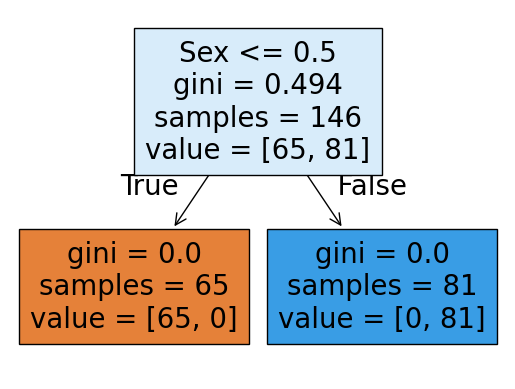

In [40]:
plot_tree(model, feature_names=['Pclass','Age','Fare','Sex'], filled=True)
plt.show()